In [1]:
%run sharedMethods.ipynb

In [2]:

config = Config({'expiration': '30DEC22',
          'strikes': [ 20000, 40000, 60000 ]
         })

In [3]:
display(Markdown(f'## Price changes for **{config.expiration}**'))

## Price changes for **30DEC22**

In [4]:
display(Markdown(f'### Strikes **{config.strikes}**'))

### Strikes **[20000, 40000, 60000]**

In [5]:
merged_df = getMergedDataframe(config)

# Unfortunately that leads to a wrong line chart
#merged_df = merged_df.interpolate(method='linear') # or cubic

merged_df = merged_df.dropna()
merged_df


'option_data/BTC-30DEC22-20000-C.json exist already.'

timestamp   btc_usd  option_20000_usd  option_40000_usd   
8    2022-12-25  16828.00           8.41400           8.41400  \
30   2022-12-13  17772.00         133.29000         133.29000   
34   2022-12-11  17091.00         102.54600         102.54600   
56   2022-11-30  17170.00         223.21000         223.21000   
66   2022-11-25  16508.00         189.84200         189.84200   
..          ...       ...               ...               ...   
344  2022-05-24  29632.15       12089.91720       12089.91720   
347  2022-05-09  30082.00       12664.52200       12664.52200   
350  2022-05-05  36533.93       18230.43107       18230.43107   
362  2022-01-22  35091.11       18247.37720       18247.37720   
366  2022-01-07  41535.66       24879.86034       24879.86034   

     option_60000_usd  
8              8.4140  
30             8.8860  
34             8.5455  
56             3.4340  
66            16.5080  
..                ...  
344         3318.8008  
347         4046.0290  
350         6210.7681  
362         8421.8664  
366        13706.7678  

[117 rows x 5 columns]

### Show the Plain prices of BTC and the Options

In [6]:

showPlainPriceChart(merged_df, config.strikes)

In [7]:
getTradingViewWidget("Bitstamp:BTCUSD")


### Move the lines up to the same startpoint of BTC to roughly visualize the delta

In [8]:

shiftLinesToTheStartOfBTC(merged_df, config.strikes)
merged_df

timestamp   btc_usd  option_20000_usd  option_40000_usd   
8    2022-12-25  16828.00           8.41400           8.41400  \
30   2022-12-13  17772.00         133.29000         133.29000   
34   2022-12-11  17091.00         102.54600         102.54600   
56   2022-11-30  17170.00         223.21000         223.21000   
66   2022-11-25  16508.00         189.84200         189.84200   
..          ...       ...               ...               ...   
344  2022-05-24  29632.15       12089.91720       12089.91720   
347  2022-05-09  30082.00       12664.52200       12664.52200   
350  2022-05-05  36533.93       18230.43107       18230.43107   
362  2022-01-22  35091.11       18247.37720       18247.37720   
366  2022-01-07  41535.66       24879.86034       24879.86034   

     option_60000_usd  option_20000_offsetted_usd  option_40000_offsetted_usd   
8              8.4140                 16664.21366                 16664.21366  \
30             8.8860                 16789.08966                 16789.08966   
34             8.5455                 16758.34566                 16758.34566   
56             3.4340                 16879.00966                 16879.00966   
66            16.5080                 16845.64166                 16845.64166   
..                ...                         ...                         ...   
344         3318.8008                 28745.71686                 28745.71686   
347         4046.0290                 29320.32166                 29320.32166   
350         6210.7681                 34886.23073                 34886.23073   
362         8421.8664                 34903.17686                 34903.17686   
366        13706.7678                 41535.66000                 41535.66000   

     option_60000_offsetted_usd  
8                    27837.3062  
30                   27837.7782  
34                   27837.4377  
56                   27832.3262  
66                   27845.4002  
..                          ...  
344                  31147.6930  
347                  31874.9212  
350                  34039.6603  
362                  36250.7586  
366                  41535.6600  

[117 rows x 8 columns]

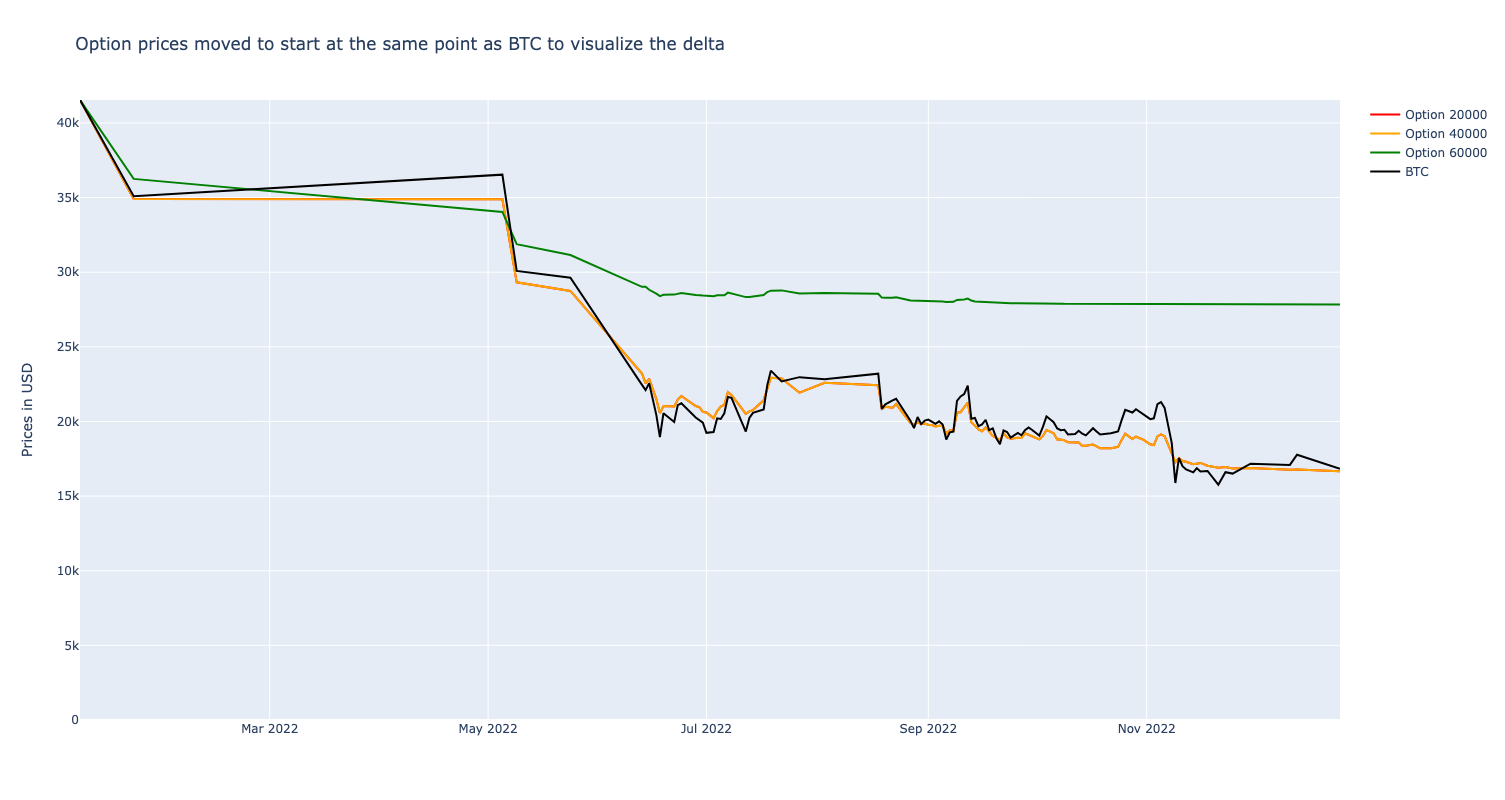

In [9]:
showOffsettedPriceChart(merged_df, config.strikes)

In [10]:
dfPricesChangedUSD = getPriceChanges(merged_df, config.strikes)
dfPricesChangedUSD
        

timestamp   btc_usd  option_20000_changed_usd   
8    2022-12-25  16828.00                -124.87600  \
30   2022-12-13  17772.00                  30.74400   
34   2022-12-11  17091.00                -120.66400   
56   2022-11-30  17170.00                  33.36800   
66   2022-11-25  16508.00                -109.01200   
..          ...       ...                       ...   
344  2022-05-24  29632.15                -574.60480   
347  2022-05-09  30082.00               -5565.90907   
350  2022-05-05  36533.93                 -16.94613   
362  2022-01-22  35091.11               -6632.48314   
366  2022-01-07  41535.66                       NaN   

     option_20000_changed_percent  option_40000_changed_usd   
8                    -1484.145472                -124.87600  \
30                      23.065496                  30.74400   
34                    -117.668168                -120.66400   
56                      14.949151                  33.36800   
66                     -57.422488                -109.01200   
..                            ...                       ...   
344                     -4.752760                -574.60480   
347                    -43.948829               -5565.90907   
350                     -0.092955                 -16.94613   
362                    -36.347597               -6632.48314   
366                           NaN                       NaN   

     option_40000_changed_percent  option_60000_changed_usd   
8                    -1484.145472                   -0.4720  \
30                      23.065496                    0.3405   
34                    -117.668168                    5.1115   
56                      14.949151                  -13.0740   
66                     -57.422488                    8.2065   
..                            ...                       ...   
344                     -4.752760                 -727.2282   
347                    -43.948829                -2164.7391   
350                     -0.092955                -2211.0983   
362                    -36.347597                -5284.9014   
366                           NaN                       NaN   

     option_60000_changed_percent  btc_usd_changed_usd   
8                       -5.609698              -944.00  \
30                       3.831870               681.00   
34                      59.815107               -79.00   
56                    -380.722190               662.00   
66                      49.712261               -95.00   
..                            ...                  ...   
344                    -21.912379              -449.85   
347                    -53.502807             -6451.93   
350                    -35.601044              1442.82   
362                    -62.752140             -6444.55   
366                           NaN                  NaN   

     btc_usd_changed_percent  
8                  -5.609698  
30                  3.831870  
34                 -0.462232  
56                  3.855562  
66                 -0.575479  
..                       ...  
344                -1.518115  
347               -21.447809  
350                 3.949260  
362               -18.365193  
366                      NaN  

[117 rows x 10 columns]

### Absolute changes in USD compared to previous day. The Delta.

In [11]:
dfPricesChangedUSD = dfPricesChangedUSD.dropna()

plotOptionPricesChangedUSD(dfPricesChangedUSD, config.strikes)


### Percent changes compared to previous data point relative to the BTC price

#### The out of the money options fluctuate more than the options that are more in the money.

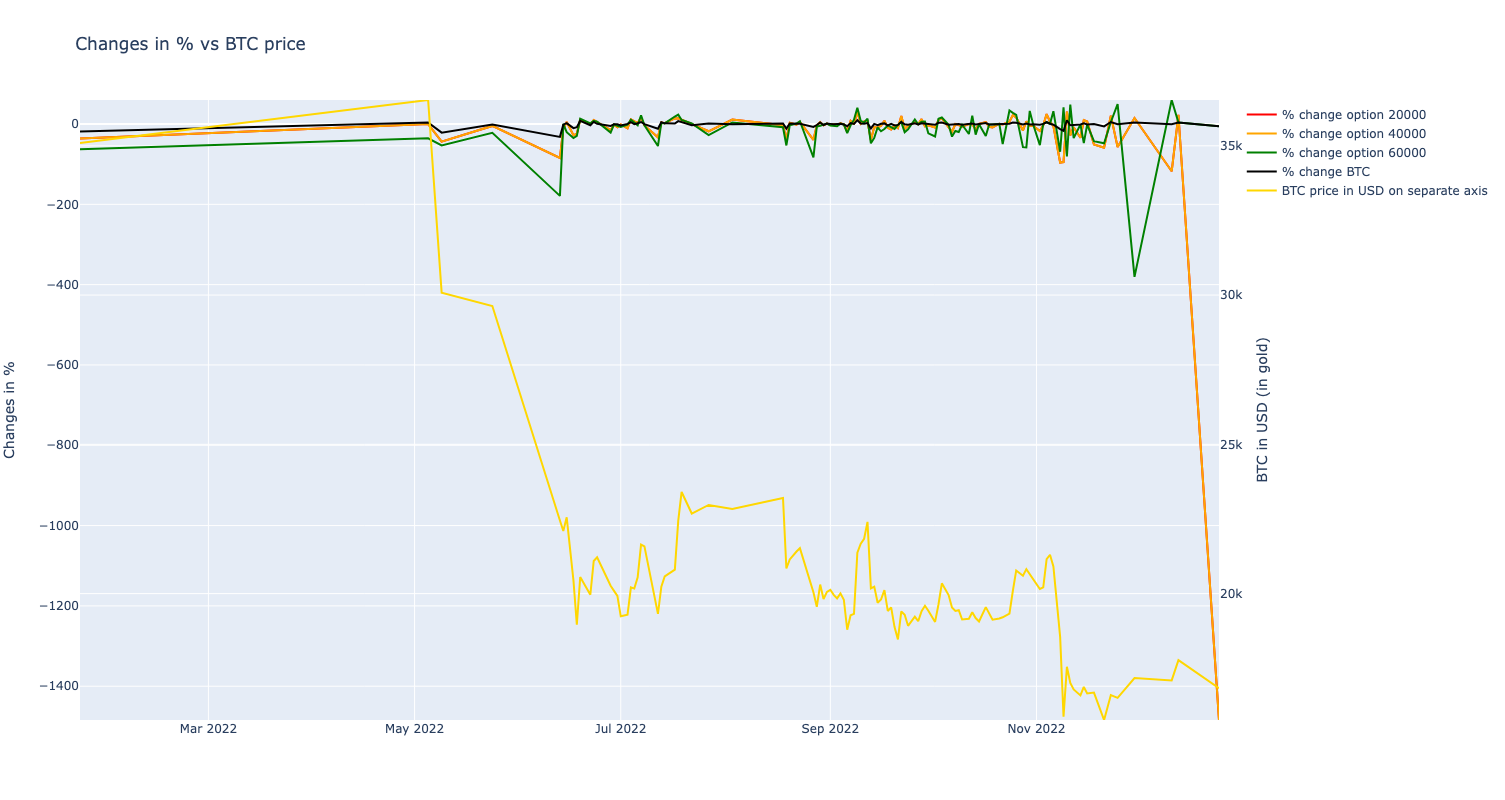

In [12]:
display(Markdown('#### The out of the money options fluctuate more than the options that are more in the money.'))
plotOptionPricesChangedPercent(dfPricesChangedUSD, config.strikes)

## Price increase in %

In [13]:
df_percent_all = calcGains(merged_df, config.strikes)

#with pd.option_context('display.max_rows', None):
#    display(df_percent_all)
df_percent_all

timestamp   btc_usd  btc_percent_all  option_20000_usd   
8    2022-12-25  16828.00       -59.485416           8.41400  \
30   2022-12-13  17772.00       -57.212670         133.29000   
34   2022-12-11  17091.00       -58.852225         102.54600   
56   2022-11-30  17170.00       -58.662027         223.21000   
66   2022-11-25  16508.00       -60.255838         189.84200   
..          ...       ...              ...               ...   
344  2022-05-24  29632.15       -28.658531       12089.91720   
347  2022-05-09  30082.00       -27.575486       12664.52200   
350  2022-05-05  36533.93       -12.042014       18230.43107   
362  2022-01-22  35091.11       -15.515704       18247.37720   
366  2022-01-07  41535.66         0.000000       24879.86034   

     option_20000_percent_all  option_40000_usd  option_40000_percent_all   
8                  -99.966181           8.41400                -99.966181  \
30                 -99.464265         133.29000                -99.464265   
34                 -99.587835         102.54600                -99.587835   
56                 -99.102849         223.21000                -99.102849   
66                 -99.236965         189.84200                -99.236965   
..                        ...               ...                       ...   
344                -51.406812       12089.91720                -51.406812   
347                -49.097295       12664.52200                -49.097295   
350                -26.726152       18230.43107                -26.726152   
362                -26.658040       18247.37720                -26.658040   
366                  0.000000       24879.86034                  0.000000   

     option_60000_usd  option_60000_percent_all  
8              8.4140                -99.938614  
30             8.8860                -99.935171  
34             8.5455                -99.937655  
56             3.4340                -99.974947  
66            16.5080                -99.879563  
..                ...                       ...  
344         3318.8008                -75.787138  
347         4046.0290                -70.481524  
350         6210.7681                -54.688310  
362         8421.8664                -38.556876  
366        13706.7678                  0.000000  

[117 rows x 9 columns]

In [14]:
plotOptionPricesChangedPercentAll(df_percent_all, config.strikes)